In [ ]:
import numpy as np


class Perceptron(object):
  eta : float
  n_iter : int
  random_state : int # сид для генерации случайных чисел

  w_: np.array
  errors_ : list # список ошибок на каждой итерации(для отслеживания улучшения качества модели)
  
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state
    
  def fit(self, X, y):
    # X - массив из образцов
    # y - массив из меток классов
    rgen = np.random.RandomState(self.random_state)
    # нормальное распределение, мат ожидание - 0, отклонение - 0.01, 1 + X.shape[1] - длина возращаемого массива равна 1 + количество признаков
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + len(X[0]))
    self.errors_ = []

    for _ in range(self.n_iter):
      errors = 0
      for x, target in zip(X, y): # зип составляет массив из пар образец-метка
        update = self.eta * (target - self.predict(x))
        for i in range(1, len(self.w_)):
          self.w_[i] += update * x[i-1]
        # self.w_[1:] += update * xi
        self.w_[0] += update # у веса xi = 1, поэтому нет смысла умножать на него
        errors += int(update != 0) # ошибка равна единице, если полученное значение не равно настоящему и вес обновился
      self.errors_.append(errors)
    return self
  
  def net_input(self, X):
    return np.dot(X, self.w_[1:]) + self.w_[0] # возвращает z
  
  def predict(self, X):
    return np.where(self.net_input(X) >= 0.0, 1, -1) # возвращает 1, если z >= 0, иначе -1
  
  def score(self, X, y):
    points = len(y)

    for x, target in zip(X, y):
      if self.predict(x) != target:
        points -= 1
        
    return f"{(points / len(y)) * 100}%"

In [175]:
import pandas as pd
import os
from sklearn import datasets
from IPython.display import display


data = datasets.load_iris() # setosa, versicolor, virginica
dataset = pd.DataFrame(data.data, columns=data.feature_names).iloc[:100]
y = pd.Series([1] * 50 + [-1] * 50)

trainDataset = pd.concat([dataset.iloc[:35], dataset.iloc[50:85]], ignore_index=True)[dataset.columns].values.tolist()
testDataset = pd.concat([dataset.iloc[35:50], dataset.iloc[85:]], ignore_index=True)[dataset.columns].values.tolist()

train_y = pd.concat([y[:35], y[50:85]], ignore_index=True)
test_y = pd.concat([y[35:50], y[85:]], ignore_index=True)

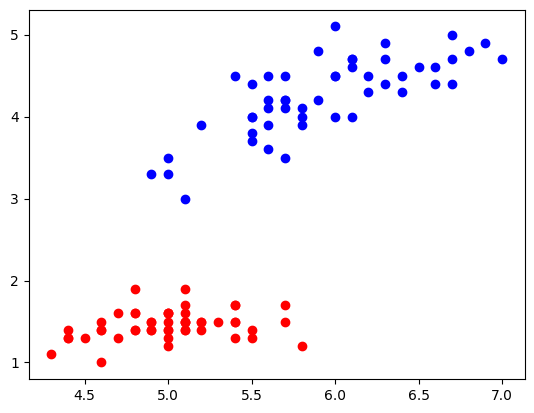

In [176]:
import matplotlib.pyplot as plt

plt.scatter(dataset['sepal length (cm)'].iloc[:50], dataset['petal length (cm)'].iloc[:50], color='red')
plt.scatter(dataset['sepal length (cm)'].iloc[50:], dataset['petal length (cm)'].iloc[50:], color='blue')

plt.show()

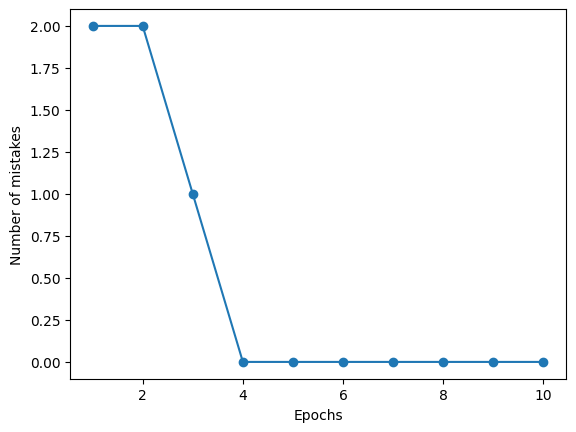

In [177]:
ppn = Perceptron(n_iter=10)
ppn.fit(trainDataset, train_y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker="o")
plt.xlabel("Epochs")
plt.ylabel("Number of mistakes")
plt.show()

In [178]:
print(ppn.score(trainDataset, train_y))
print(ppn.score(testDataset, test_y))

100.0%
100.0%
